In [1]:
import os 
import pandas as pd 
import boto3 
import matplotlib.pyplot as plt
import seaborn as sns

/mnt/d/Escritorio/zrive/.venv/lib/python3.11/site-packages/numpy/_core/getlimits.py:552: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


In [2]:
def download_data_from_s3(bucket_name: str, object_path: str, local_file_path: str) -> None: 
    try: 
        s3 = boto3.client('s3', aws_access_key_id=os.getenv('ACCESS_KEY_ID'), aws_secret_access_key=os.getenv('SECRET_ACCESS_KEY')) 
        os.makedirs(os.path.dirname(local_file_path), exist_ok=True)
        s3.download_file(bucket_name, object_path, local_file_path)
        print(f"{local_file_path} downloaded successfully.")
    except Exception as e:
        print(f"Error downloading {local_file_path}: {e}")

bucket_name = 'zrive-ds-data' 
base_path = 'groceries/box_builder_dataset/'
file_name = 'feature_frame.csv'
local_file_path = f"data/{file_name}"
download_data_from_s3(bucket_name, f"{base_path}{file_name}", local_file_path)

data/feature_frame.csv downloaded successfully.


---

In [2]:
file_name = 'feature_frame.csv'
local_file_path = f"data/{file_name}"

data = pd.read_csv(local_file_path)
data.head()

,variant_id,product_type,order_id,user_id,created_at,order_date,user_order_seq,outcome,ordered_before,abandoned_before,...,count_children,count_babies,count_pets,people_ex_baby,days_since_purchase_variant_id,avg_days_to_buy_variant_id,std_days_to_buy_variant_id,days_since_purchase_product_type,avg_days_to_buy_product_type,std_days_to_buy_product_type
0,33826472919172,ricepastapulses,2807985930372,3482464092292,2020-10-05 16:46:19,2020-10-05 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
1,33826472919172,ricepastapulses,2808027644036,3466586718340,2020-10-05 17:59:51,2020-10-05 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
2,33826472919172,ricepastapulses,2808099078276,3481384026244,2020-10-05 20:08:53,2020-10-05 00:00:00,4,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
3,33826472919172,ricepastapulses,2808393957508,3291363377284,2020-10-06 08:57:59,2020-10-06 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
4,33826472919172,ricepastapulses,2808429314180,3537167515780,2020-10-06 10:37:05,2020-10-06 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618


In [7]:
data.columns 

Index(['variant_id', 'product_type', 'order_id', 'user_id', 'created_at',
       'order_date', 'user_order_seq', 'outcome', 'ordered_before',
       'abandoned_before', 'active_snoozed', 'set_as_regular',
       'normalised_price', 'discount_pct', 'vendor', 'global_popularity',
       'count_adults', 'count_children', 'count_babies', 'count_pets',
       'people_ex_baby', 'days_since_purchase_variant_id',
       'avg_days_to_buy_variant_id', 'std_days_to_buy_variant_id',
       'days_since_purchase_product_type', 'avg_days_to_buy_product_type',
       'std_days_to_buy_product_type'],
      dtype='object')

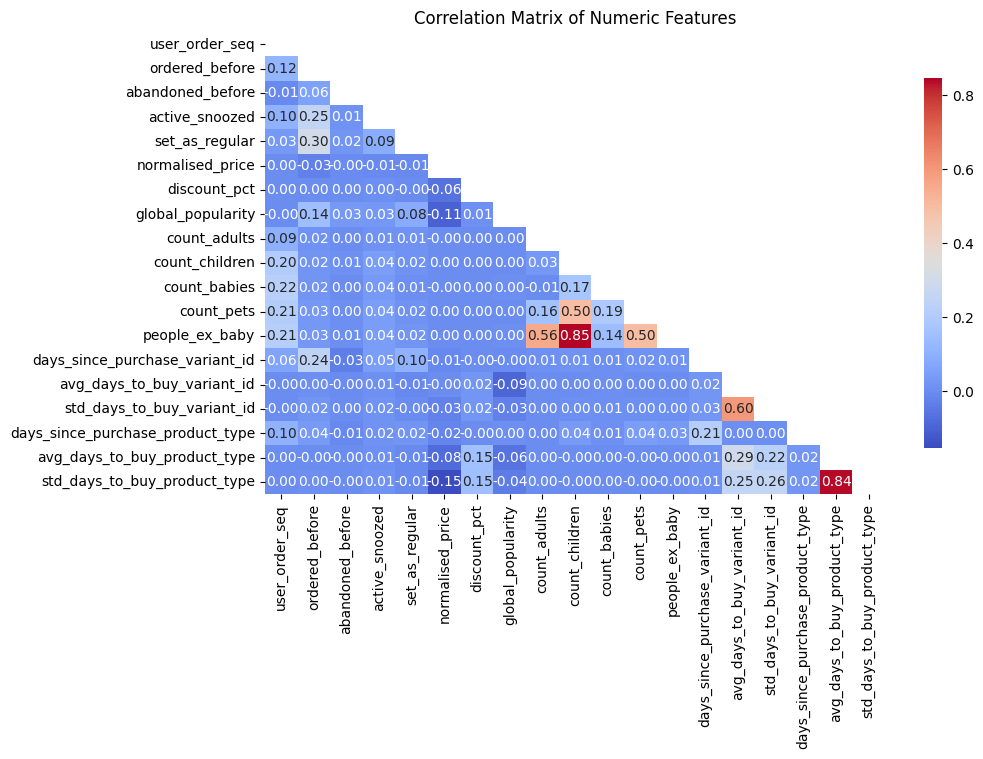

In [3]:
import numpy as np 

numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns 
numeric_cols = numeric_cols.drop(['variant_id', 'order_id', 'user_id', 'outcome'], errors='ignore') 
plt.figure(figsize=(10, 6)) 
corr = data[numeric_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numeric Features')
plt.show()

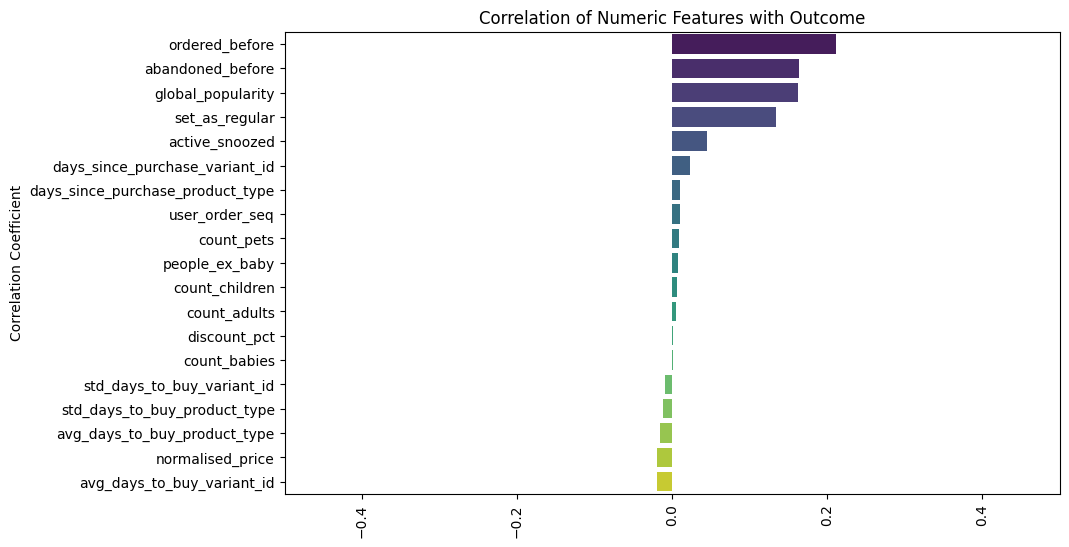

In [ ]:
plt.figure(figsize=(10, 6))
corr_outcome = data[numeric_cols].corrwith(data['outcome'])
corr_outcome = corr_outcome.sort_values(ascending=False)
sns.barplot(x=corr_outcome.values, y=corr_outcome.index, hue=corr_outcome.index, palette='viridis')
plt.xlim(-0.5, 0.5)
plt.xticks(rotation=90)
plt.title('Correlation of Numeric Features with Outcome')
plt.ylabel('Correlation Coefficient')
plt.show()